In [1]:
#Imports
import json
import numpy as np
import pandas as pd
import csv
import os
from math import log
from pylab import lstsq
from pylab import matrix
from pylab import exp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#encodes a dictionary into a jason
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


def jasonGenerator(path,results,photo_name):
    """ Generates a .jason file in the path given folder from the a dictionary """
    with open(path + '/analysis_result_' + photo_name + '.json',"w") as miarch:
        miarch.write(json.dumps(results, cls=NumpyEncoder))

In [3]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [4]:
def slicesParser_max_peaksI(dictres):
#extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x) for x in range(0,len(allSlices[0]['max_peaks_intensities']))]    
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    for i in range(0,len(allSlices)):
        df_sum.loc[i] = allSlices[i]['max_peaks_intensities'][0:] 
    return df_sum

In [5]:
def slicesParser_halfpeakstime(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['times_to_half_peaks']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['times_to_half_peaks']
    return df_sum

In [6]:
def slicesParser_amplitudes(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['amplitudes']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['amplitudes']

    return df_sum

In [7]:
def slicesParser_min_peaksI(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['min_peaks_intensities']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['min_peaks_intensities']

    return df_sum

In [8]:
def slicesParser_peaktime(dictres):
    #extract all the slices data
    allSlices = dictres['slices']

    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['times_to_peaks']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['times_to_peaks']

    return df_sum

# Calcula el alternance ratio

AR_list = []
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/jsons/'
jsons_list = os.listdir(path)
for file in jsons_list:
    path_file = path + file
    dic = jasonReader(path_file)
    slices = dic['slices']
    i = 0
    df = pd.DataFrame(columns=['transient1','transient2','transient_max'])
    print (file)
    for i in range(0,33):
        try:
            amps = slices[i]['amplitudes'][0:2]
            amps.append(max(amps))
            i += 1
            df.loc[len(df)] = amps
        except IndexError:
            pass
    df.to_csv(path + file + 'max_amp.csv', sep='\t')
print('Done')

In [12]:
# Guarda en tablas separadas los datos de cada json por parámetro

param_list = ['max_peaks_positions','min_peaks_positions','max_peaks_intensities','min_peaks_intensities','amplitudes','times_to_peaks','times_to_half_peaks']
path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
path2 = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/'
for param in param_list:
    os.makedirs(path2 + param + '/')
    jsons_list = os.listdir(path)
    for file in jsons_list:
        path_file = path + file
        dic = jasonReader(path_file)
        slices = dic['slices']
        i = 0
        df = pd.DataFrame(columns=['transient1','transient2'])
        print (file)
        for i in range(0,33):
            try:
                amps = slices[i][param][0:2]
                i += 1
                df.loc[len(df)] = amps
            except IndexError:
                pass
        df.to_csv(path2 + param + '/' + file + param + '.csv', sep='\t')
    print('Done')

010719ctrol1_analysis_result_ctrol1a0.json
010719ctrol1_analysis_result_ctrol1b0.json
010719ctrol8_analysis_result_ctrol8a0.json
010719ctrol8_analysis_result_ctrol8b0.json
010719Dan2_analysis_result_dan2a000.json
010719Dan2_analysis_result_dan2b000.json
010719Dan6_analysis_result_dan6a000.json
010719Dan6_analysis_result_dan6b000.json
010719VK3_analysis_result_vk3a000.json
010719VK3_analysis_result_vk3b002.json
010719VK7_analysis_result_vk7a000.json
010719VK7_analysis_result_vk7b000.json
010819c1_analysis_result_c1a000.json
010819c1_analysis_result_c1b000.json
010819c2_analysis_result_c2a000.json
010819c2_analysis_result_c2b000.json
010819c3_analysis_result_c3a000.json
010819c3_analysis_result_c3b001.json
010819c3_analysis_result_c3c000.json
031019c1_analysis_result_c1b000.json
031019c1_analysis_result_c1e000.json
031019c2_analysis_result_c2b000.json
031019c2_analysis_result_c2e000.json
031019c2_analysis_result_c2f000.json
031019c3_analysis_result_c3b000.json
031019c3_analysis_result_c3

In [13]:
# Guarda en una tabla los datos de la célula entera

path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
path2 = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/'
jsons_list = os.listdir(path)
os.makedirs(path2 + 'whole_cell/')
for file in jsons_list:
    path_file = path + file
    dic = jasonReader(path_file)
    dic = dic['image']
    pairs = {k: dic[k] for k in list(dic)[1:]}
    keys = list(pairs.keys())
    df = pd.DataFrame()
    for label in range(0,len(pairs)):
        df[keys[label]] = pairs[keys[label]][0:2]
    df = df.T
    df.columns = ['Transient1', 'Transient2']
    df.to_csv(path2 + 'whole_cell/' + file + '.csv', sep='\t')
print('Done')

Done


### Parseo de tablas de TAU

In [9]:
# path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/'
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
experiments = os.listdir(path + 'taus_preliminar/')
taus_exp = pd.DataFrame()
for i in range(0,len (experiments)):
    experiment = experiments[i]
    tau_file = pd.read_excel(path + 'taus_preliminar/' + experiment)
    del tau_file['Unnamed: 0']
    taus_exp[experiment] = list(tau_file.mean())
local_taus_mean = taus_exp.T
local_taus_mean.columns = ['transient1','transient2']
local_taus_mean['file'] = local_taus_mean.index
local_taus_mean = local_taus_mean.reset_index(drop=True)

In [9]:
# path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/'
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
experiments = os.listdir(path + 'amplitudes_norm/')
amp_exp = pd.DataFrame()
for i in range(0,len (experiments)):
    experiment = experiments[i]
    amp_file = pd.read_excel(path + 'amplitudes_norm/' + experiment)
    del amp_file['Unnamed: 0']
    amp_exp[experiment] = list(amp_file.mean())
local_amp_mean = amp_exp.T
local_amp_mean.columns = ['transient1','transient2']
local_amp_mean['file'] = local_amp_mean.index
local_amp_mean = local_amp_mean.reset_index(drop=True)

In [10]:
tau_file = pd.read_excel(path + 'wc_tau_preliminar.xlsx')
del tau_file['Unnamed: 0']

In [56]:
amp_file = pd.read_excel(path + 'amplitudes_wc_norm.xlsx')
del amp_file['Unnamed: 0']
del amp_file['Unnamed: 0.1']

In [57]:
amp_file

,experimento,célula,foto,tratamiento,frecuencia,WC_norm_T1,WC_norm_T2
0,010719SEL,010719ctrol1,ctrol1b0.tif,C,1,0.182266,0.173077
1,010719SEL,010719ctrol1,ctrol1a0.tif,C,5,1.10837,1.08654
2,010719SEL,010719VK3,vk3b002.tif,VK,5,0.413793,0.571429
3,010719SEL,010719VK3,vk3a000.tif,VK,1,5.58621,6.57143
4,010719SEL,010719VK7,vk7b000.tif,VK,1,2.05882,1.83333
...,...,...,...,...,...,...,...
140,311019sel,311019c6sel,c6a000.tif,C,1,17.5,17
141,311019sel,311019c1sel,c1a000.tif,C,1,2.66667,2.55556
142,311019sel,311019c1sel,c1d000.tif,C,5,1.66667,1.66667
143,311019sel,311019dan3,dan3a000.tif,DAN,1,2.36842,2.55556


In [11]:
tabulado = pd.read_csv(path + 'tabulado')
del tabulado['Unnamed: 0']

In [12]:
tabulado.head()

,experimento,célula,foto,tratamiento,frecuencia
0,010719SEL,010719ctrol1,ctrol1b0.tif,C,1
1,010719SEL,010719ctrol1,ctrol1a0.tif,C,5
2,010719SEL,010719VK3,vk3b002.tif,VK,5
3,010719SEL,010719VK3,vk3a000.tif,VK,1
4,010719SEL,010719VK7,vk7b000.tif,VK,1


In [13]:
# Filtrado por tratamiento y frecuencia

def tau_filter(tratamiento,frecuencia,df):
    tabulado_filter = tabulado[(tabulado['tratamiento']==tratamiento) & (tabulado['frecuencia']== frecuencia)].reset_index(drop=True)
    tau = pd.DataFrame(columns = ['transient1','transient2','file'])
    for j in range(0,len (tabulado_filter)):
        celula = tabulado_filter['célula'][j]
        foto = tabulado_filter['foto'][j][:-4]
        for i in range(0,len (df)):
            if (celula in df['file'][i]) & (foto in df['file'][i]):
                tau.loc[j] = df.loc[i]
    return tau

In [14]:
def outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    idx = ~((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    return idx

In [50]:
tau_file.head()

,transient1,transient2,file
0,56.642803,50.441796,010719ctrol1_analysis_result_ctrol1a0.json
1,21.848068,22.281768,010719ctrol1_analysis_result_ctrol1b0.json
2,17.606736,17.085831,010719ctrol8_analysis_result_ctrol8a0.json
3,108.615258,95.514131,010719ctrol8_analysis_result_ctrol8b0.json
4,65.503319,55.030121,010719Dan2_analysis_result_dan2a000.json


In [35]:
tratamiento = ['C','VK','DAN']
frecuencia = [1,5]
df_list = []
for t in tratamiento:
    for f in frecuencia:
        tau_control = tau_filter(t,f,local_taus_mean)
        wc_tau_control = tau_filter(t,f,tau_file)
        diff_result = pd.DataFrame(columns=['delta_transient1','delta_transient2','file'])
        delta_transient1 = []
        delta_transient2 = []
        file = []
        for i in wc_tau_control['file'].tolist():
            filtro_df2 = wc_tau_control[(wc_tau_control['file'].str.contains(i) == True)]
            filtro_df1 = tau_control[tau_control['file'].str.contains(i) == True]
            delta_transient1.append(float((filtro_df2['transient1'] -filtro_df1['transient1'])/filtro_df1['transient1']))
            delta_transient2.append(float((filtro_df2['transient2'] -filtro_df1['transient2'])/filtro_df1['transient2']))
            file.append(i)
        diff_result['delta_transient1'] = delta_transient1
        diff_result['delta_transient2'] = delta_transient2
        diff_result['file'] = file
        # Replacing infinite with nan 
        diff_result.replace([np.inf, -np.inf], np.nan, inplace=True) 
        # Dropping all the rows with nan values 
        diff_result.dropna(inplace=True)
        # Printing df 
        diff_result = diff_result[(diff_result['delta_transient1'] < 100) & (diff_result['delta_transient1'] > -50) & (diff_result['delta_transient2'] < 50) & (diff_result['delta_transient2'] > -100)]
        df_list.append(diff_result)

In [46]:
for i in range(0,1):#len(df_list)-1):
    a1 = df_list[i]['delta_transient1'][outliers(df_list[i]['delta_transient1'])]
    b1 = df_list[i+1]['delta_transient1'][outliers(df_list[i+1]['delta_transient1'])]
    a2 = df_list[i]['delta_transient2'][outliers(df_list[i]['delta_transient2'])]
    b2 = df_list[i+1]['delta_transient2'][outliers(df_list[i+1]['delta_transient2'])]
    a = (a1+a2)/2
    a = a.dropna()
    b = (b1+b2)/2
    b = b.dropna()
    print(scipy.stats.ttest_ind(a,b))
    print(scipy.stats.shapiro(a))
    print(scipy.stats.kstest(a,b))

Ttest_indResult(statistic=-0.15201897778814688, pvalue=0.8799556799703498)
ShapiroResult(statistic=0.92046058177948, pvalue=0.07770708203315735)
KstestResult(statistic=0.13875598086124402, pvalue=0.9619205497251211)


In [47]:
df = pd.concat ([a,b], axis=1, sort=False, keys=['1Hz', '5Hz'])

<AxesSubplot:>

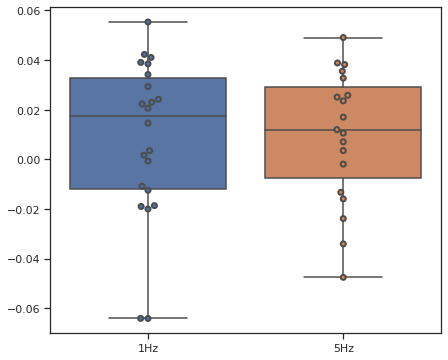

In [48]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=df)

sns.swarmplot(data=df, linewidth=2)
# plt.savefig('AR')

In [209]:
tau_control = tau_filter('C',5,local_taus_mean)
wc_tau_control = tau_filter('C',5,tau_file)
tau_control = tau_control.replace([np.inf, -np.inf], np.nan)
tau_control = tau_control.dropna() 
wc_tau_control = wc_tau_control.replace([np.inf, -np.inf], np.nan) 
wc_tau_control = wc_tau_control.dropna() 
a = tau_control['transient1'][outliers(tau_control['transient1'])]
b = wc_tau_control['transient1'][outliers(wc_tau_control['transient1'])]
print(scipy.stats.ttest_ind(a,b))
print(scipy.stats.shapiro(b))

Ttest_indResult(statistic=0.3008371884596892, pvalue=0.7657612640328353)
ShapiroResult(statistic=0.9791214466094971, pvalue=0.8906724452972412)


<AxesSubplot:>

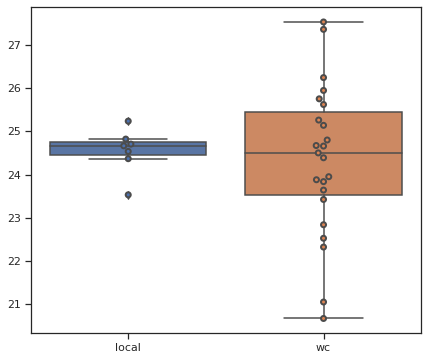

In [210]:
df = pd.concat ([a,b], axis=1, sort=False, keys=['local', 'wc'])
df
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=df)

sns.swarmplot(data=df, linewidth=2)

## Correlación DI y tau

In [211]:
DI_control = pd.read_csv(path + 'DI_control.csv')

In [212]:
wc5_control = df_list[1].mean(axis=1)
df_list[1]['transient_mean'] = wc5_control
tau5 = []
for i in range(0,len(DI_control['file'])):
    cel = DI_control['file'][i]
    filtro_wc5 = df_list[1][(df_list[1]['file'].str.contains(cel) == True)]
    tau5.append (filtro_wc5['transient_mean'].values)
DI_control['tau5'] = tau5

In [213]:
# del DI_control['DISCORDANCE 5 Hz'][7]
a = DI_control['DISCORDANCE 5 Hz'].tolist()

In [217]:
DI_control

,file,Discordance 1Hz,DISCORDANCE 5 Hz,tau5
0,220119,0.13,0.34,[]
1,170719c1,0.09,0.02,[-0.0937354795462575]
2,170719c5,0.17,0.28,[]
3,010819c1,0.26,0.35,[]
4,010819c2,0.07,0.22,[]
5,010819c3,0.12,0.37,[]
6,230819c1,0.05,0.14,[]
7,230819c2,0.08,0.06,[]
8,031019c1,0.12,0.59,[]
9,031019C4,0.07,0.42,[]


In [214]:
# del DI_control['tau5'][15]
b = [j for i in DI_control['tau5'].tolist() for j in i]

In [215]:
from scipy.stats.stats import pearsonr 
print (pearsonr(a,b))

ValueError: x and y must have the same length.

ValueError: x and y must be the same size

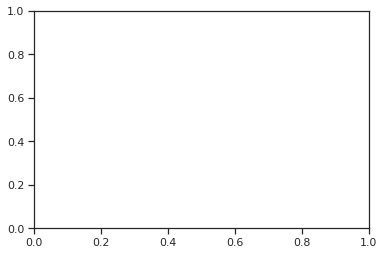

In [216]:
plt.scatter(a,b)

In [165]:
amp_file = pd.read_excel(path + 'amplitudes_wc_norm.xlsx')

In [166]:
amp_file

,Unnamed: 0,Unnamed: 0.1,experimento,célula,foto,tratamiento,frecuencia,WC_norm_T1,WC_norm_T2
0,0,0,010719SEL,010719ctrol1,ctrol1b0.tif,C,1,0.182266,0.173077
1,1,1,010719SEL,010719ctrol1,ctrol1a0.tif,C,5,1.10837,1.08654
2,2,2,010719SEL,010719VK3,vk3b002.tif,VK,5,0.413793,0.571429
3,3,3,010719SEL,010719VK3,vk3a000.tif,VK,1,5.58621,6.57143
4,4,4,010719SEL,010719VK7,vk7b000.tif,VK,1,2.05882,1.83333
...,...,...,...,...,...,...,...,...,...
140,220,221,311019sel,311019c6sel,c6a000.tif,C,1,17.5,17
141,221,222,311019sel,311019c1sel,c1a000.tif,C,1,2.66667,2.55556
142,223,224,311019sel,311019c1sel,c1d000.tif,C,5,1.66667,1.66667
143,225,226,311019sel,311019dan3,dan3a000.tif,DAN,1,2.36842,2.55556


In [169]:
tau_file

,transient1,transient2,file
0,56.642803,50.441796,010719ctrol1_analysis_result_ctrol1a0.json
1,21.848068,22.281768,010719ctrol1_analysis_result_ctrol1b0.json
2,17.606736,17.085831,010719ctrol8_analysis_result_ctrol8a0.json
3,108.615258,95.514131,010719ctrol8_analysis_result_ctrol8b0.json
4,65.503319,55.030121,010719Dan2_analysis_result_dan2a000.json
...,...,...,...
135,17.267893,17.103768,311019dan5_analysis_result_dan5d000.json
136,35.566780,32.231780,311019vk2_analysis_result_vk2a000.json
137,16.114639,15.060354,311019vk2_analysis_result_vk2d000.json
138,56.573753,49.745670,311019vk4_analysis_result_vk4a000.json
